In [70]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
from networkx.utils import powerlaw_sequence, random_sequence
from networkx import configuration_model
import scipy.special

In [3]:
def draw_graph(network):
    nx.draw(network, pos=nx.spring_layout(network))  


[ 0  0 11  2  1  2  1  1  1  1]
[1 2 3 4 5 6 7 8 9]


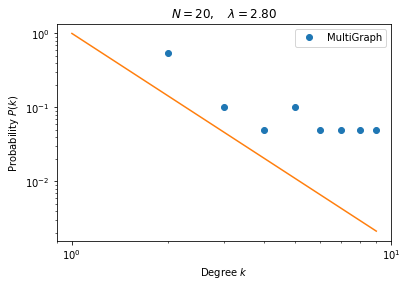

' network = nx.gnp_random_graph(6, 0.7, seed=None, directed=False) scale_free_graph(n, alpha=0.41, beta=0.54, gamma=0.05, delta_in=0.2, delta_out=0, create_using=None, seed=None, initial_graph=None) draw_graph(network) '

In [84]:
"""scale-free network = la probabilità che un nodo abbia grado k è più o meno k^-lambda, lambda parametro"""

"""NON HO IDEA DI COME SI CALCOLI L'ESPONENTE CHE SAREBBE IL NOSTRO LAMBDA"""
def create_scale_free(num_nodes, random_edge, prob_triangle , seed):
    
    graph = nx.powerlaw_cluster_graph(num_nodes, random_edge, prob_triangle, seed)
    node_degree = list(graph.degree()) #list (node, degree)
    lamda_v = []
    current_edges = 0
    list_deg = []
    for node, degree in node_degree:
        list_deg.append(degree)
        current_edges += degree
        lamda_v.append(current_edges / (scipy.special.comb(degree,2)))#sbagliato current_edges dovrebbe essere nodo per nodo quando vengono creati gli edge
                                                                      #così prende solo la somma di quelli già creati
    counts = np.bincount(list_deg)
    print(counts)
    mask = (counts > 0)
    plt.plot(np.arange(len(counts))[mask], counts[mask] / counts.sum(), "o", label="MultiGraph")
    x = np.arange(1, len(counts))
    print(x)
    plt.plot(x, np.power(x, -2.8))
    plt.xlabel(r"Degree $k$")
    plt.xscale("log")
    plt.ylabel(r"Probability $P(k)$")
    plt.yscale("log")
    plt.title(r"$N = {0:d}, \quad \lambda = {1:.2f}$".format(num_nodes, 2.8))
    plt.legend(loc="best")
    plt.show()
    return graph 

network = create_scale_free(20, 2, 0.1 , 123456789)
#draw_graph(network)

""" network = nx.gnp_random_graph(6, 0.7, seed=None, directed=False) scale_free_graph(n, alpha=0.41, beta=0.54, gamma=0.05, delta_in=0.2, delta_out=0, create_using=None, seed=None, initial_graph=None) draw_graph(network) """

In [ ]:
""" """
def percolation_one_node_random(network):
    
    lenght_of_list = len(network.nodes)
    network.remove_node(random.randint(0, lenght_of_list))
    
    return network


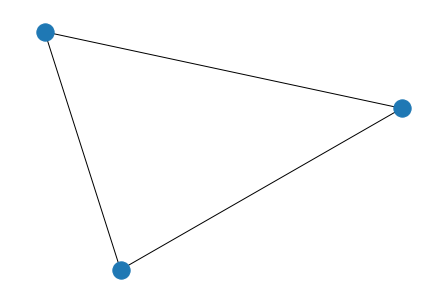

In [ ]:
"""percentuale di nodi tolti sul totale della rete"""
def percolation_loop_removal(network, percentage):
    
    percentage = round(percentage * len(network.nodes))
    
    for i in range(0, percentage):
        network = percolation_one_node_random(network)
    
    return network

network = percolation_loop_removal(network, 0.5)
draw_graph(network)

In [ ]:
def 